
<div style="line-height:2px;border: solid orange">
    <p>
    <p style="color:blue;font-family:arial;text-align:right;font-size:20"> Visión por Computador &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Master en Ciencias de Datos e Ingeniería de Ordenadores   &nbsp;&nbsp;
  <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Rosa Mª. Rodríguez Sánchez   &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> Dpto. Ciencias de la Computación e Inteligencia Artificial. &nbsp;&nbsp;  
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> ETSIIT. Universidad de Granada   &nbsp;&nbsp;
        <p>
</div>

# Práctica 5 (Parte I) Transformada de Hotelling (Transformada discreta Karhunen-Loeve o PCA).

### Introducción
La transformada Hotelling o PCA, también conocida como transformada autovector, componente principal o transformada discreta de Karhunen-Loéve, se basa en
propiedades estadísticas de representaciones vectoriales. El objetivo es obtener una representación de las muestras con menor número de rasgos. Para ellos la transformada Hotelling lo que hace es extraer los rasgos más relevantes de un conjunto de muestras.  
<img src="pca_line.png">

Considera el conjunto de puntos 2D como se muestra en el figura de arriba. Cada dimensión se corresponde con un rasgo. Como se puede ver los puntos se alinean alrededor de la línea azul. Así una forma de reducir la dimensionalidad es representar los datos con solamente la línea azul, reduciendo la dimensionalidad de 2D a 1D.

Además, vemos que los puntos tiene una mayor varianza en la dirección del rasgo 1 (eje x) que en la dirección del rasgo 2 (eje y). Por lo tanto si conocemos la posición de un punto a lo largo de linea azul tenemos más información acerca del punto que si solamente conocemos el valor del punto para el rasgo 1 o para el rasgo 2. 

De esta forma PCA nos permitirá encontrar la dirección en la que los datos tiene la mayor varianza. De hecho si ejecutamos PCA sobre el conjunto de datos nos devuelve 2 vectores que  se denominan autovectores que son las componentes principales del conjunto de datos.
<img src="pca_eigen.png">

El tamaño de cada autovector lo indica el correspondiente autovalor. El autovalor nos informa de la varianza de los datos a lo largo de la componente principal. El origen (comienzo ) de cada autovector es el centro de todos los puntos en el conjunto. 


### Pasos a seguir para aplicar PCA
Dado un  conjunto de datos $X=\{x_1,x_2,\dots,x_n\}$  donde cada $x_i=\{x_{i1},x_{i2},\dots,x_{ip}\}$ tiene dimension $p$, queremos obtener un conjunto de datos $Y$ que se pueda representar cada muestra con un menor número de datos.
Asi los pasos a seguir para obtener el conjunto de datos $Y$ son: 
<ol>
    <li> Escribir el conjunto de datos $X$ en una matriz. Cada $x_i$ se escribe en una fila. Obteniendo una matrix $X$ de dimensión $n\times p$
    <li> Obtener la media de cada columna  como $m[j]=\frac{1}{n}\sum_{i=1}^n X[i,j]$. Siendo $m$ un vector de dimensión $p\times 1$
    <li> Obtener la matriz centrada $B= X-h m^T$. Siendo h un vector columna $n\times 1$ de unos. Siendo $B$ una matriz $n\times p$ .
    <li> Encontrar la matriz de covarianza de B como $C=\frac{1}{n-1}B^T B $  
    <li> Obtener los autovectores $V$ y autovalores $D$ de $C$. $D$ es una matriz $p\times p $ diagonal. $V$ es una metriz $p\times p$
    <li> Aplicar los autovectores $V$ a la matriz $B$, obteniendo $Y$
</ol>

    

### Ejemplo
Supongamos que tenemos el siguiente conjunto de imágenes 
<table border=0>
    <tr><td><img src='TH/a.jpg'></td><td><img src='TH/b.jpg'></td><td><img src='TH/c.jpg'></td></tr>
    <tr><td><img src='TH/d.jpg'></td><td><img src='TH/d.jpg'></td><td></td></tr>
</table>
Nuestro objetivo es reducir el número de imágenes para representar la misma información de la camioneta.
Para ello veamos como se ejecuta los pasos comentados anteriormente.
En el siguiente código se construye la matriz $X$ a partir del conjunto de imágenes de la camioneta.

In [3]:
import numpy as np
import cv2
#Creamos la matriz X

img_a=cv2.imread('TH/a.jpg',0)
img_b=cv2.imread('TH/b.jpg',0)
img_c=cv2.imread('TH/c.jpg',0)
img_d=cv2.imread('TH/d.jpg',0)
img_e=cv2.imread('TH/e.jpg',0)
#ravel reduce las dimensiones a 1 dejando la imagen como un vector
#X es una matriz donde por ejemplo en la fila 0 tiene la informacion del pixel (0,0) de cada imagen
X=np.array([np.ravel(img_a),np.ravel(img_b),np.ravel(img_c),np.ravel(img_d),np.ravel(img_e)])
X=X.T
X=X.astype('float32')
print(X.shape)

(33696, 5)


Hay que tener en cuenta que las muestras son los pixeles, y los rasgos son los valores que toman cada pixel en las 5 imágenes. A continuación obtenemos la medias.

In [4]:
m=np.mean(X, axis=0) 
print(m)

[171.20189 162.4889  175.4667   98.4562  130.71922]


Ahora construimos la matriz B

In [5]:
h= np.ones((X.shape[0],1),dtype='uint8')
B=X-h*m
print(B.shape)

(33696, 5)


Obtenemos la covariaza de B

In [6]:

C=1.0/(X.shape[0]-1)*np.dot(B.T,B)
print(C.shape)

(5, 5)


Obtenemos los autovalores y autovectores

In [7]:
from numpy import linalg as LA
D, V = LA.eig(C)
print("Autovalores: ",D)
print("Autovectores: ",V)
print("Dimensiones de D",D.shape)
print("Dimensiones de V",V.shape)

Autovalores:  [1.8516227e+04 4.8013104e+02 3.7336960e+00 7.1392751e+00 8.0704050e+00]
Autovectores:  [[-0.54342335  0.5560172   0.11988678 -0.5194232   0.33371034]
 [-0.27384585  0.2885494  -0.84340644  0.3536059  -0.07332193]
 [-0.21292917  0.4611036   0.50063103  0.5676149  -0.41137147]
 [-0.45562527 -0.34013826 -0.06053892 -0.37137416 -0.73152435]
 [-0.6138129  -0.52846336  0.14140823  0.3808634   0.42297396]]
Dimensiones de D (5,)
Dimensiones de V (5, 5)


D son los autovalores y V son los autovectores por columna. Aplicamos la transformación a continuación

(<Axes: >, <matplotlib.image.AxesImage at 0x7a68201ef200>)

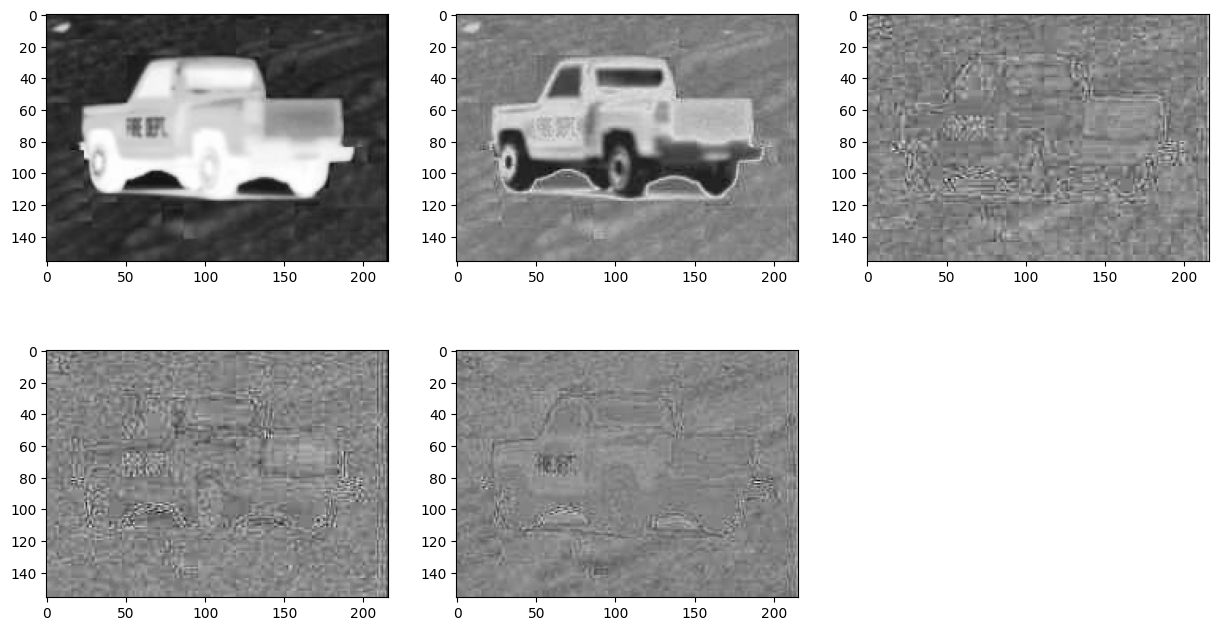

In [8]:
from matplotlib import pyplot as plt
y=np.dot(B,V)
h,w=img_a.shape
img_at=np.reshape(y[:,0],(h,w))
img_bt=np.reshape(y[:,1],(h,w))
img_ct=np.reshape(y[:,2],(h,w))
img_dt=np.reshape(y[:,3],(h,w))
img_et=np.reshape(y[:,4],(h,w))
plt.figure(figsize=(15,8))
plt.subplot(2,3,1),plt.imshow(img_at,'gray')
plt.subplot(2,3,2),plt.imshow(img_bt,'gray')
plt.subplot(2,3,3),plt.imshow(img_ct,'gray')
plt.subplot(2,3,4),plt.imshow(img_dt,'gray')
plt.subplot(2,3,5),plt.imshow(img_et,'gray')

### Usando un subconjunto de autovectores
La reconstrucción de la matriz $X$ se puede obtener como:
$X_{r}=V Y+h m^T$
Siendo h un vector columna $n\times 1$ de unos.

Supongamos que solamente  usamos un subconjunto de autovectores de $V$ formando una matriz $V_K$ que se obtiene  a partir de los K autovectores de V asociados a los  K autovalores de
mayor valor, para obtener una matriz de Kxp dimensiones. Los vectores $Y_K$ sería la submatriz de $Y$ que considera las $K\times n$ dimensionales de $Y$. Ahora la reconstruccion sería:
$\overline{X}=V_K Y_K+h m^T$. 

Se puede demostrar que el error al cuadrado medio entre $X$ y $\overline{X}$ viene dado por 
$e_K =\sum_{j=1}^p\lambda_j -\sum_{j=1}^K\lambda_j =\sum_{j=K+1}^p\lambda_j $

Ya que los autovalores  $\lambda_i$  decrecen monótonamente, también muestra que el error puede
minimizarse seleccionando los K autovectores asociados con los autovalores de mayor
valor.

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def load_images(path):
    images = []
    shape = None
    for i in range(1, 7):
        img = cv2.imread(os.path.join(path, f"banda{i}.tif"), cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise ValueError(f"Image {path}/banda{i}.tif not found.")
        if shape is None:
            shape = img.shape
        images.append(img.flatten())
    return np.array(images), shape

def compute_pca(X):
    mean = np.mean(X, axis=0)
    X_centered = X - mean
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    eigenvalues = (S ** 2) / (X.shape[0] - 1)
    eigenvectors = Vt.T
    return eigenvalues, eigenvectors, mean

def compute_errors(eigenvalues):
    errors = []
    for K in range(1, len(eigenvalues) + 1):
        error = np.sum(eigenvalues[K:])
        errors.append(error)
    return errors

def plot_errors(errors):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(errors) + 1), errors, marker='o', linestyle='--')
    plt.xlabel('Number of components (K)')
    plt.ylabel('Reconstruction error')
    plt.title('Error vs. Components used')
    plt.grid(True)
    plt.show()

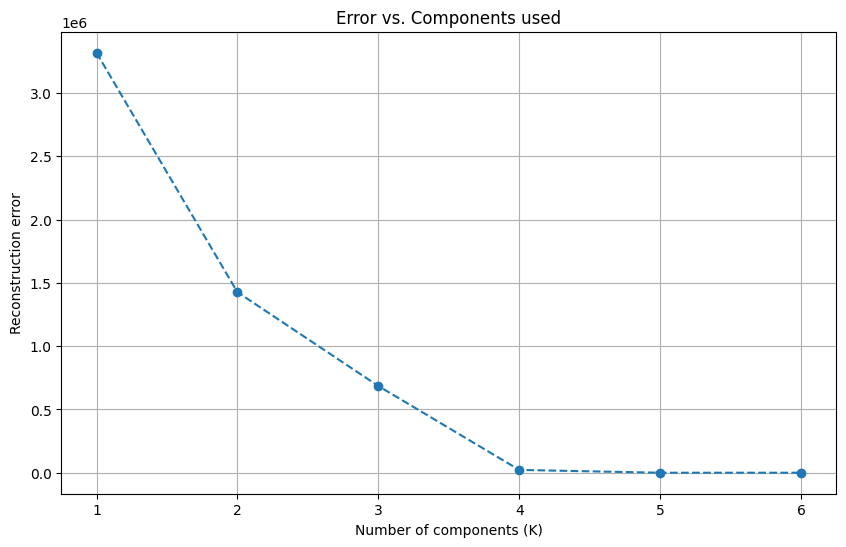

In [15]:
X, image_shape = load_images("./adra/")
eigenvalues, eigenvectors, mean = compute_pca(X)
errors = compute_errors(eigenvalues)
plot_errors(errors)

# Conclusiones
Si usamos menos componentes, el error de reconstrucción será mayor, pero reducimos la dimensionalidad de los datos, mientras que si usamos más componentes, el error disminuye, pero el modelo se vuelve más complejo; por eso, un gráfico nos puede ayudar a encontrar el "punto de codo", donde agregar más componentes ya no reduce mucho el error, lo que nos permite elegir un número óptimo de componentes para equilibrar precisión y complejidad, y en imágenes satelitales, un número pequeño de componentes puede captar estructuras grandes importantes, aunque para detalles más finos se necesiten más componentes, lo que podría causar sobreajuste si no se controla bien.